In [32]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_excel('sales.xlsx')
df.head()

,Posting Date,Entry Type,Document Type,Item No.,Description,Quantity,QTY
0,2022-01-03,Sale,Sales Shipment,1-94-190087,Veg Mayo Original 250g,-160,160
1,2022-01-03,Sale,Sales Shipment,1-94-190095,Mayo Classic 245g,-120,120
2,2022-01-03,Sale,Sales Shipment,1-94-190090,Veg Mayo Burger 250g,-100,100
3,2022-01-03,Sale,Sales Shipment,1-94-190091,Veg Mayo Garlic 250g,-100,100
4,2022-01-03,Sale,Sales Shipment,1-94-190097,Veg Mayo Green Mint 250g,-20,20


In [18]:
df.shape

(9035, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9035 entries, 0 to 9034
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Posting Date   9035 non-null   datetime64[ns]
 1   Entry Type     9035 non-null   object        
 2   Document Type  9035 non-null   object        
 3   Item No.       9035 non-null   object        
 4   Description    9035 non-null   object        
 5   Quantity       9035 non-null   int64         
 6   QTY            9035 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 494.2+ KB


In [20]:
df.Description.nunique()

115

In [23]:
sumdf=df.groupby(["Description",'Posting Date'])["QTY"].sum()

df1 = pd.DataFrame(sumdf)
df1.tail()

QTY
Description                       Posting Date     
Vegan Mayonnaise Plant Based 250g 2022-03-03    180
                                  2022-03-04     60
                                  2022-03-05    140
                                  2022-03-07    320
                                  2022-03-12     40

In [24]:
df2 = pd.pivot_table(df1, values ='QTY', index =['Description'],
                         columns =['Posting Date'], aggfunc = np.sum)

In [25]:
df2

Posting Date,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-10,2022-01-11,2022-01-12,2022-01-13,...,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-28,2022-03-29,2022-03-30,2022-03-31
Description,,,,,,,,,,,,,,,,,,,,,
American Mustard 260g,NaN,156.0,168.0,12.0,NaN,36.0,108.0,NaN,120.0,132.0,...,84.0,72.0,24.0,156.0,36.0,60.0,204.0,24.0,96.0,276.0
Arrabbiata Sauce 325g,20.0,100.0,40.0,40.0,20.0,200.0,100.0,40.0,100.0,NaN,...,80.0,NaN,40.0,40.0,40.0,NaN,20.0,NaN,100.0,100.0
AsrtedPack-Waffles[Chocolate(1)+Vanilla(1)]-(500g),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AsrtedPk-VMOrgnl(1)+SSCuCa(1)+SSThsndIslnd(1)-750g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assorted Pack-Original(1)+Garlic(1)+Burger(1)750g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veg Mayonnaise Mild & Sweet 1kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.0,NaN,NaN,NaN,NaN,540.0,NaN,60.0
Veg Mayonnaise Smoky Peri Peri 1kg,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,12.0,...,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,12.0
Veg Mayonnaise Tandoori 1kg,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [26]:
df2.isnull().sum()

Posting Date
2022-01-03    92
2022-01-04    67
2022-01-05    69
2022-01-06    76
2022-01-07    95
              ..
2022-03-26    72
2022-03-28    56
2022-03-29    77
2022-03-30    66
2022-03-31    41
Length: 76, dtype: int64

In [27]:
df3= df2.fillna(0, inplace=True)
df2.head(1)

Posting Date,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-10,2022-01-11,2022-01-12,2022-01-13,...,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-28,2022-03-29,2022-03-30,2022-03-31
Description,,,,,,,,,,,,,,,,,,,,,
American Mustard 260g,0.0,156.0,168.0,12.0,0.0,36.0,108.0,0.0,120.0,132.0,...,84.0,72.0,24.0,156.0,36.0,60.0,204.0,24.0,96.0,276.0


In [28]:
df3=df2.T
df3.head()

Description,American Mustard 260g,Arrabbiata Sauce 325g,AsrtedPack-Waffles[Chocolate(1)+Vanilla(1)]-(500g),AsrtedPk-VMOrgnl(1)+SSCuCa(1)+SSThsndIslnd(1)-750g,Assorted Pack-Original(1)+Garlic(1)+Burger(1)750g,Assorted Pack-VM Original(2)+Burger(1) 750g,Assorted Pack-VM Original(2)+Garlic(1) 750g,Assorted Pack-VMOrgnl(1)+SSCuCa(1)+SSC&C(1) 750g,Bake Mix 11 Cakes 250g,Bake Mix Brownie 250g,...,Veg Mayonnaise De'lite 750g,Veg Mayonnaise For Burger 1kg,Veg Mayonnaise For Coleslaw 1kg,Veg Mayonnaise Garlic 1kg,Veg Mayonnaise Green Mint 1kg,Veg Mayonnaise Mild & Sweet 1kg,Veg Mayonnaise Smoky Peri Peri 1kg,Veg Mayonnaise Tandoori 1kg,Veg Sandwich Spread Cheese & Chilli 1kg,Vegan Mayonnaise Plant Based 250g
Posting Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-04,156.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-05,168.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,...,0.0,0.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-06,12.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72.0,24.0,0.0,0.0
2022-01-07,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df3.shape

(149, 128)

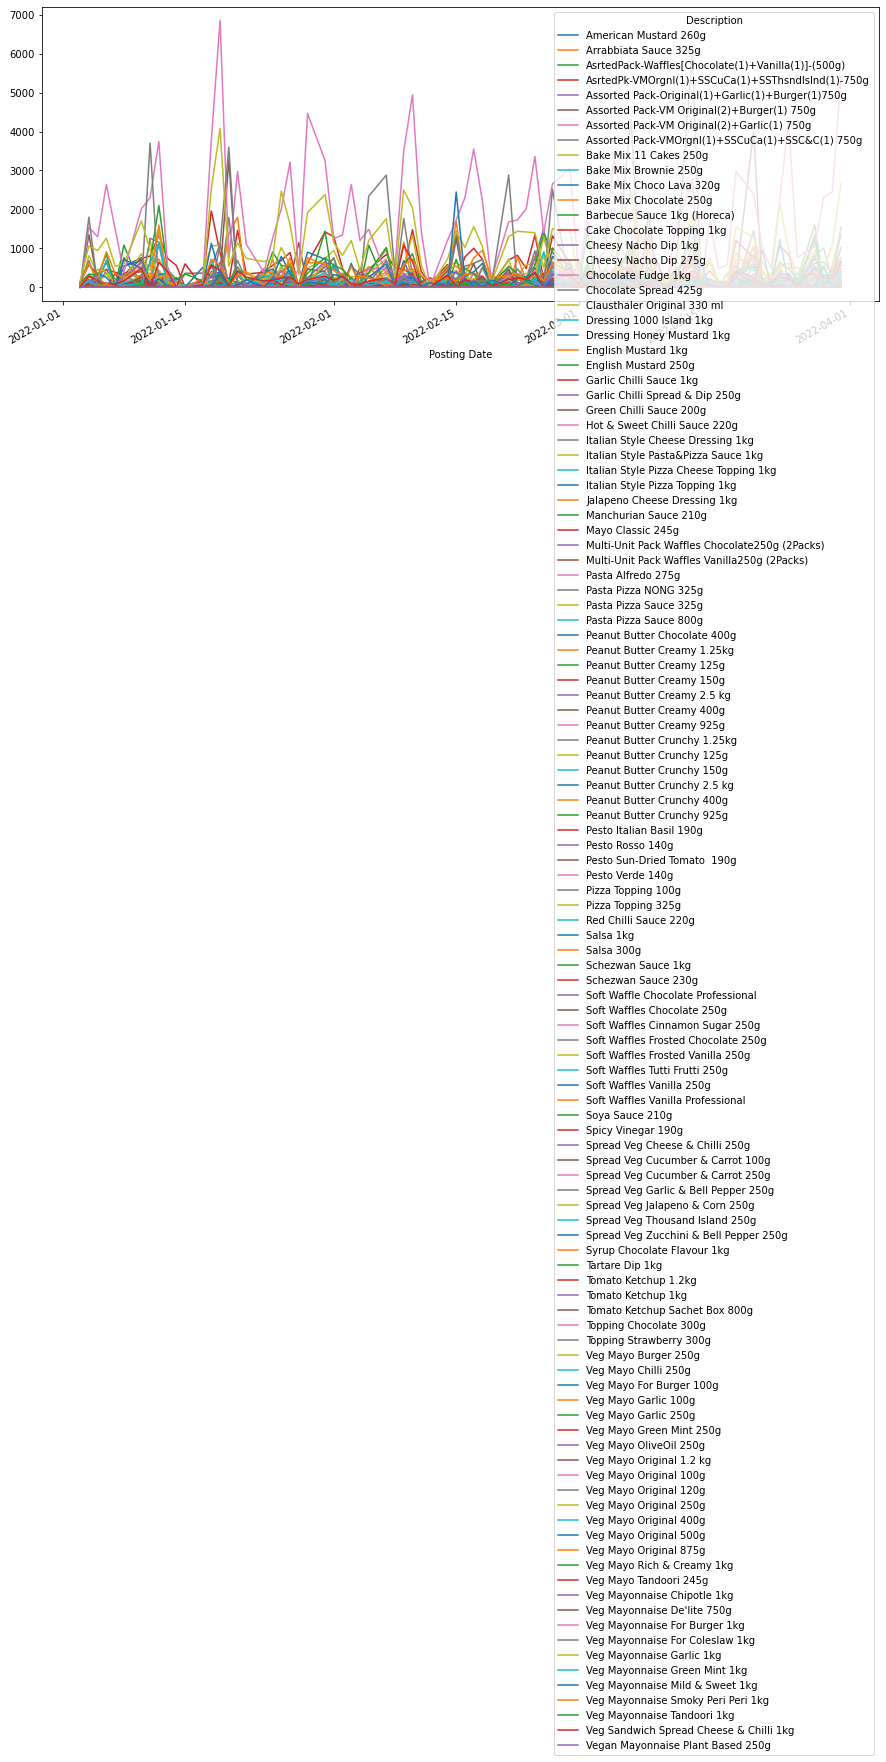

In [33]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
df3.plot.line()
plt.show()

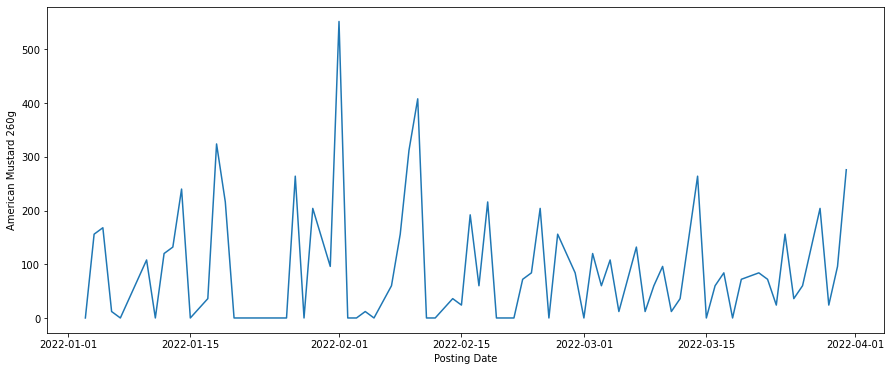

In [47]:
# Arkit
import seaborn as sns
sns.lineplot(data=df3[df3.columns[0]])
plt.show()

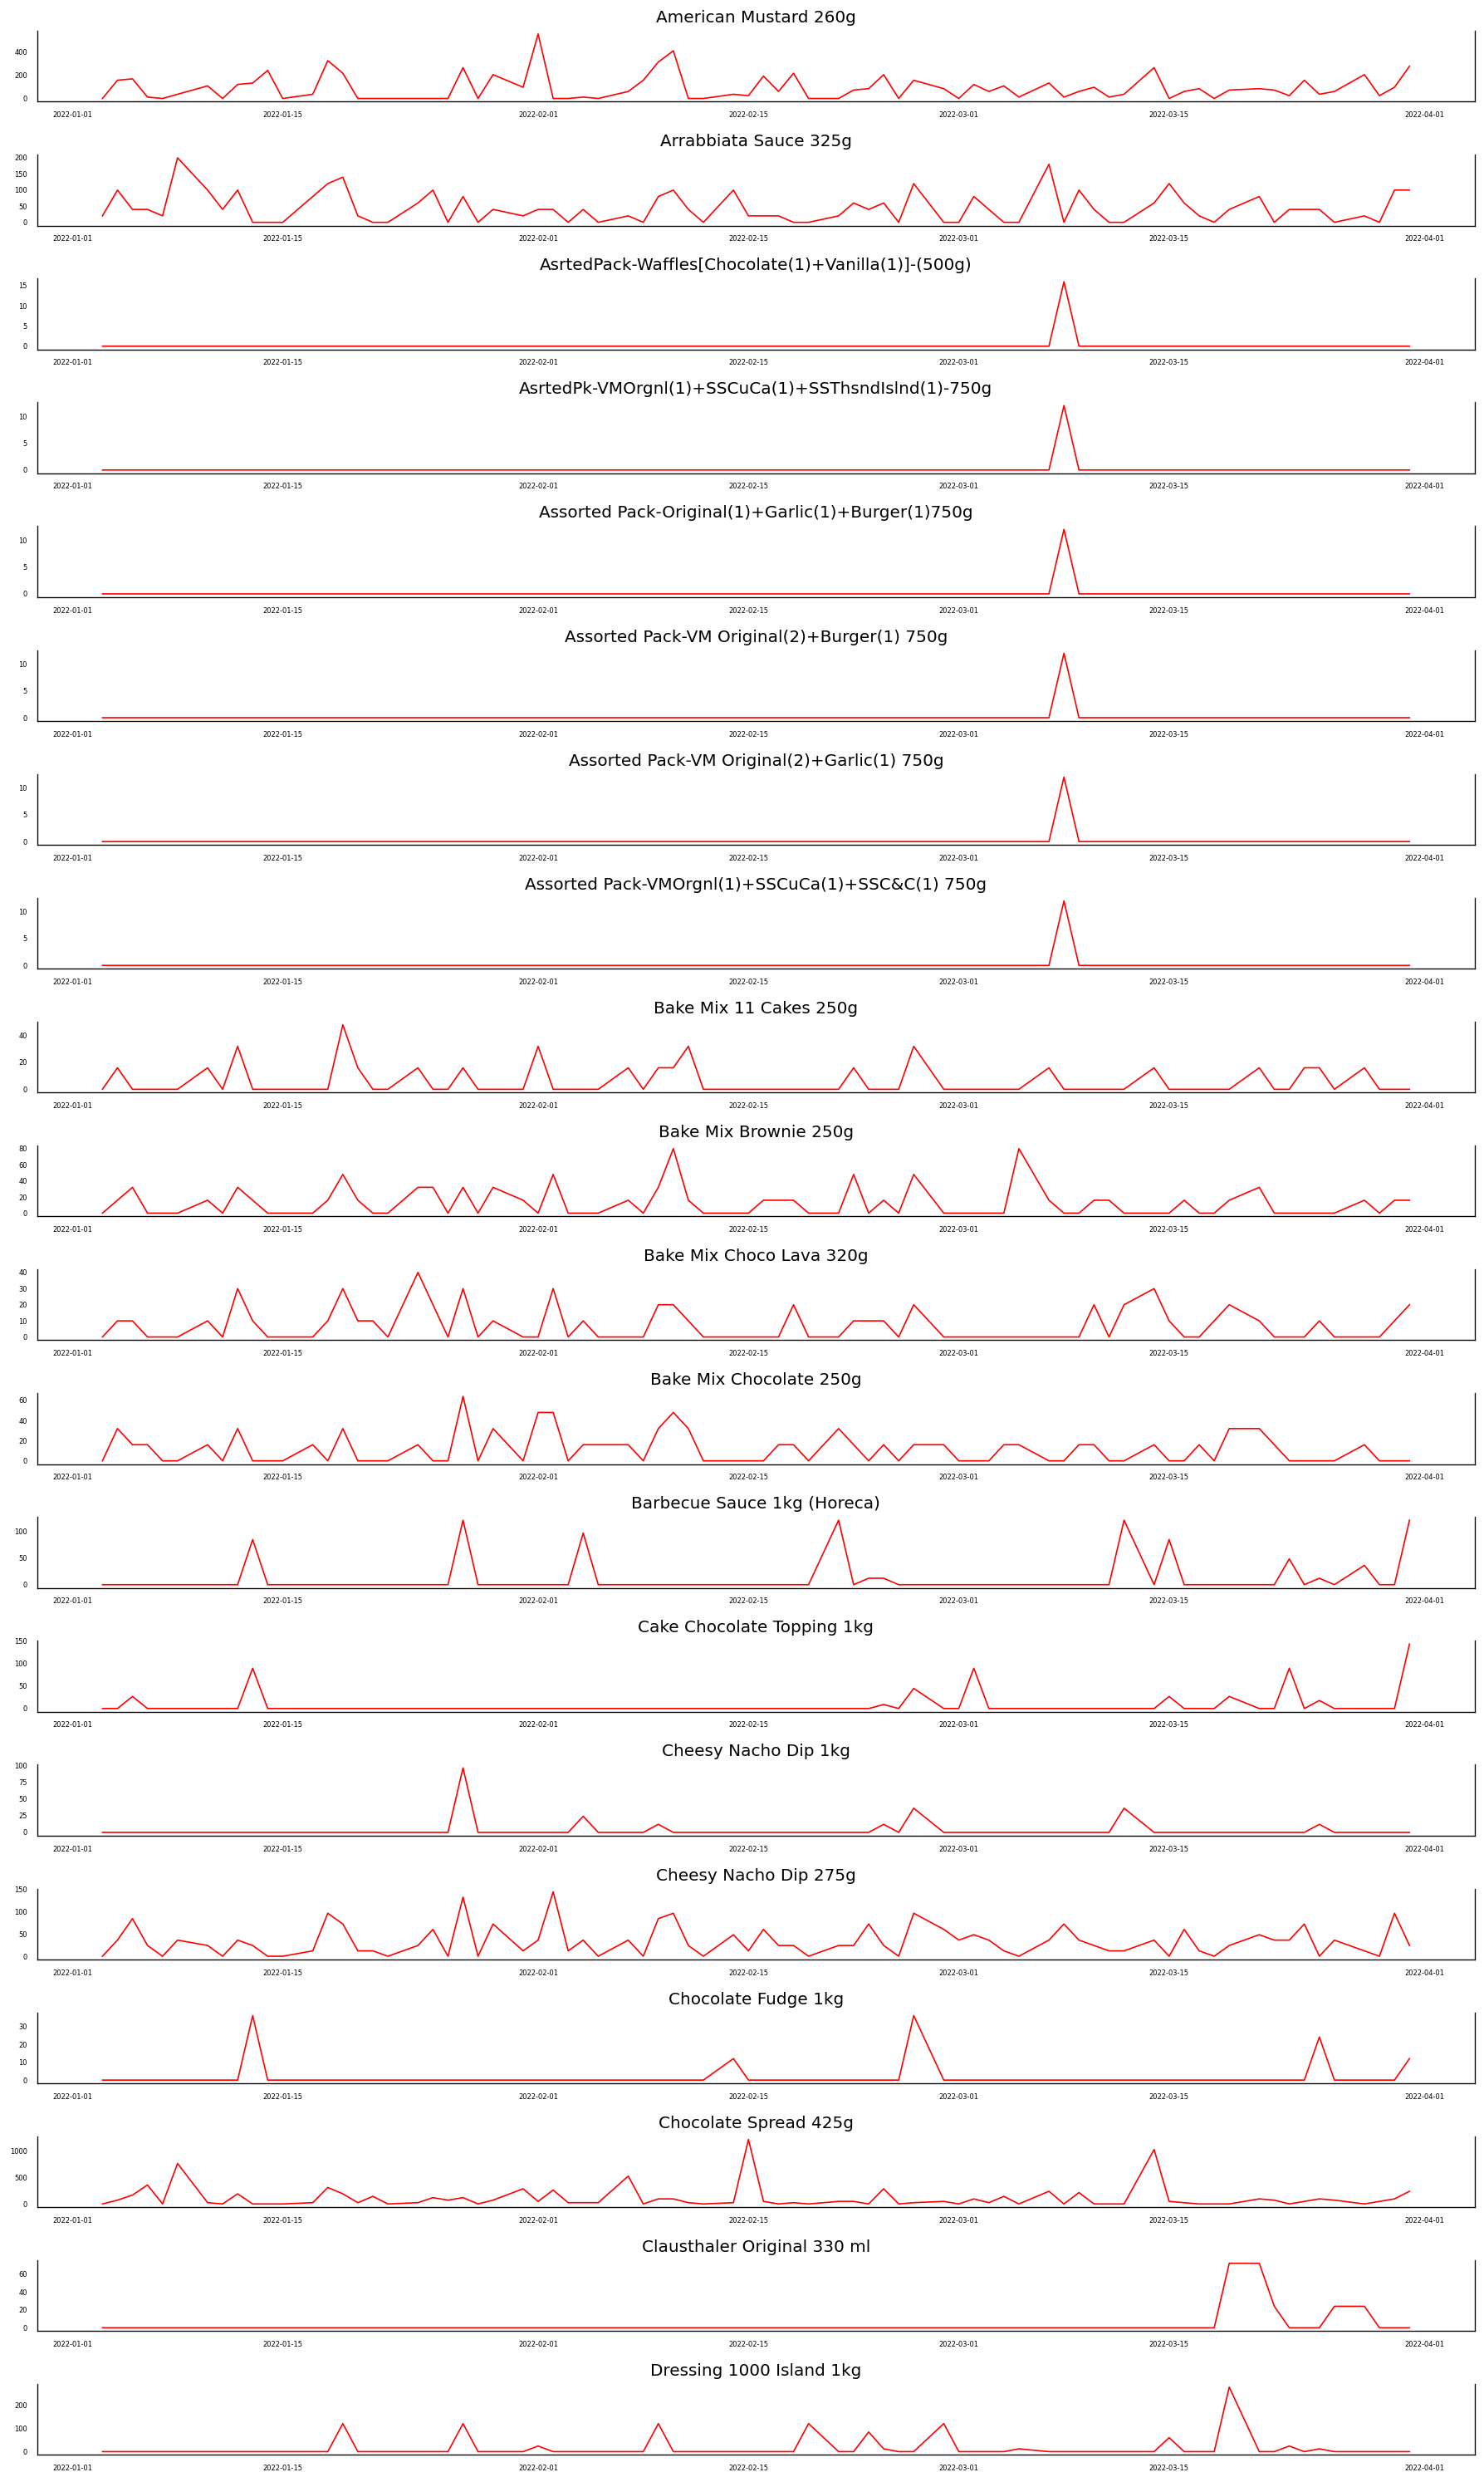

In [48]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(nrows=20, ncols=1, dpi=120, figsize=(15,25))
for i, ax in enumerate(axes.flatten()):
    data = df3[df3.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df3.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=5)

plt.tight_layout();

In [49]:
df_am=df3['American Mustard 260g']
df_am=pd.DataFrame(df_am)
df_am

,American Mustard 260g
Posting Date,
2022-01-03,0.0
2022-01-04,156.0
2022-01-05,168.0
2022-01-06,12.0
2022-01-07,0.0
...,...
2022-03-26,60.0
2022-03-28,204.0
2022-03-29,24.0


<AxesSubplot:xlabel='Posting Date'>

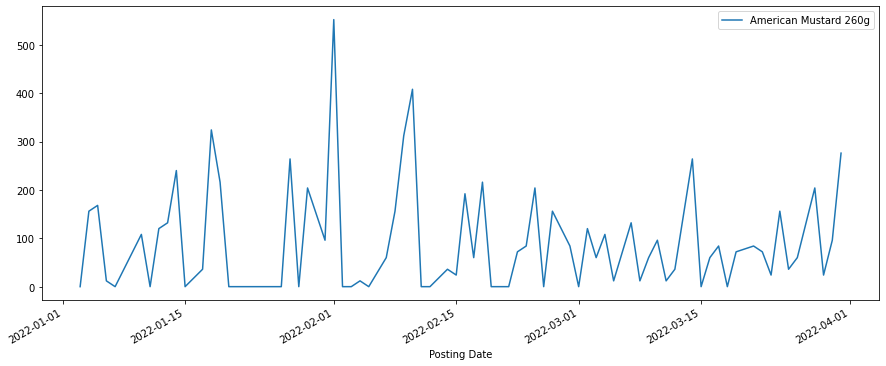

In [50]:
df_am.plot()

In [57]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df_am['American Mustard 260g'])
#Ho: It is non stationary
#H1: It is stationary

In [53]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(df_am['American Mustard 260g'])

ADF Test Statistic : -8.53347969943119
p-value : 1.0227227336442228e-13
#Lags Used : 0
Number of Observations Used : 75
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


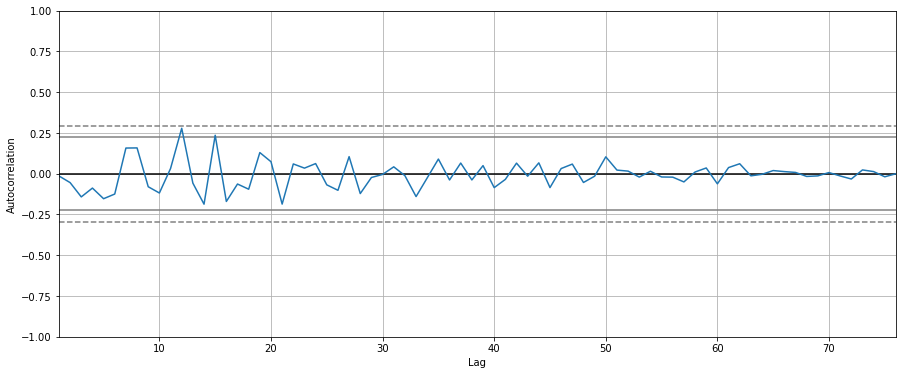

In [54]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_am['American Mustard 260g'])
plt.show()

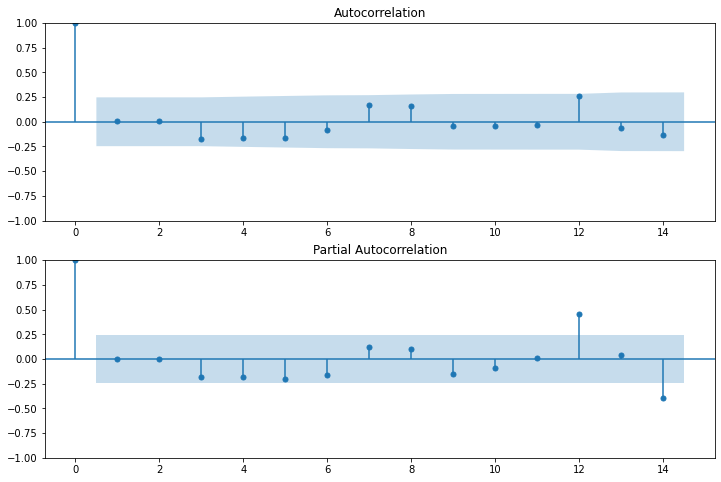

In [64]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_am['American Mustard 260g'].iloc[13:],lags=14,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_am['American Mustard 260g'].iloc[13:],lags=14,ax=ax2)

In [65]:
df_am.head()

,American Mustard 260g,forecast
Posting Date,,
2022-01-03,0.0,NaN
2022-01-04,156.0,NaN
2022-01-05,168.0,NaN
2022-01-06,12.0,NaN
2022-01-07,0.0,NaN


In [60]:
import statsmodels.tsa.arima.model as stats
model=stats.ARIMA(df_am['American Mustard 260g'],order=(4,4,4))
model_fit=model.fit()
model_fit.summary()

/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     American Mustard 260g   No. Observations:                   76
Model:                    ARIMA(4, 4, 4)   Log Likelihood                -465.788
Date:                   Sun, 24 Apr 2022   AIC                            949.577
Time:                           21:58:15   BIC                            970.067
Sample:                                0   HQIC                           957.734
                                    - 76                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5932      0.152    -10.458      0.000      -1.892      -1.295
ar.L2         -0.9598      0.297     -3.233      0.001      -1.542      -0.378
ar.L3         -0.5841      0.296     -1.973      0.048      -1.164      -0.004
ar.L4         -0.2425      0.158     -1.532      0.126      -0.553       0.068
ma.L1         -1.9804   1.02e+04     -0.000      1.000      -2e+04       2e+04
ma.L2         -0.0004   2.04e+04  -2.19e-08      1.000      -4e+04       4e+04
ma.L3          1.9804   1.02e+04      0.000      1.000      -2e+04       2e+04
ma.L4         -0.9995      0.233     -4.296      0.000      -1.456      -0.543
sigma2      1.694e+04      1.124   1.51e+04      0.000    1.69e+04    1.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.79   Prob(JB):                         0.45
Heteroskedasticity (H):               0.30   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+26. Standard errors may be unstable.
"""

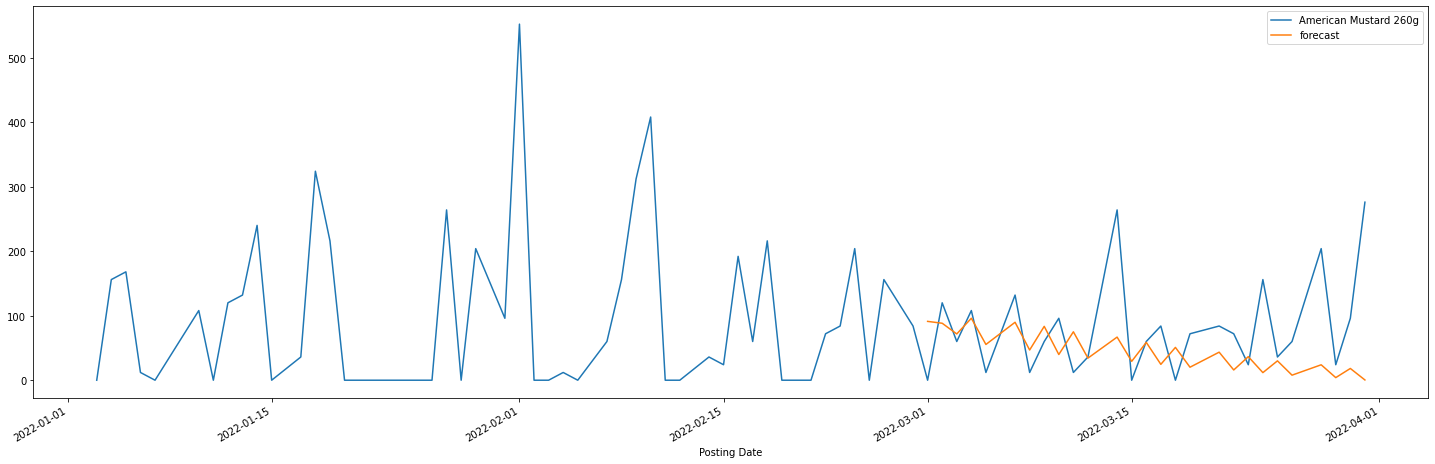

In [69]:
df_am['forecast']=model_fit.predict(start='2022-03-01',end ='2022-3-31',dynamic=True)
df_am[['American Mustard 260g','forecast']].plot(figsize=(25,8))
plt.show()

<IPython.core.display.Javascript object>

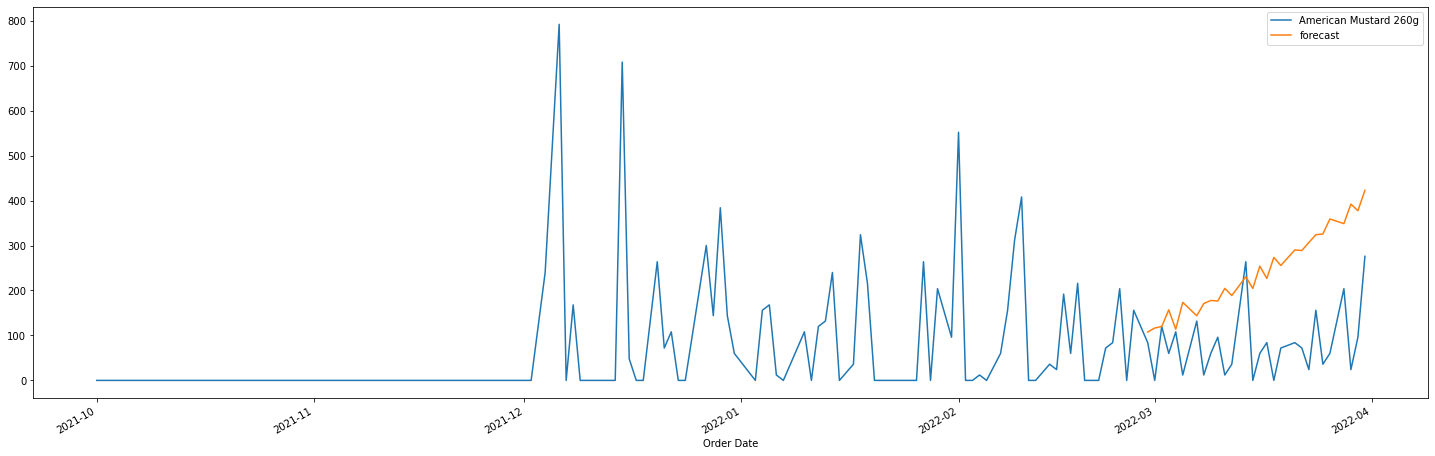

In [114]:
df_am['forecast']=model_fit.predict(start='2022-02-28',end ='2022-3-31',dynamic=True)
df_am[['American Mustard 260g','forecast']].plot(figsize=(25,8))
plt.show()

<IPython.core.display.Javascript object>

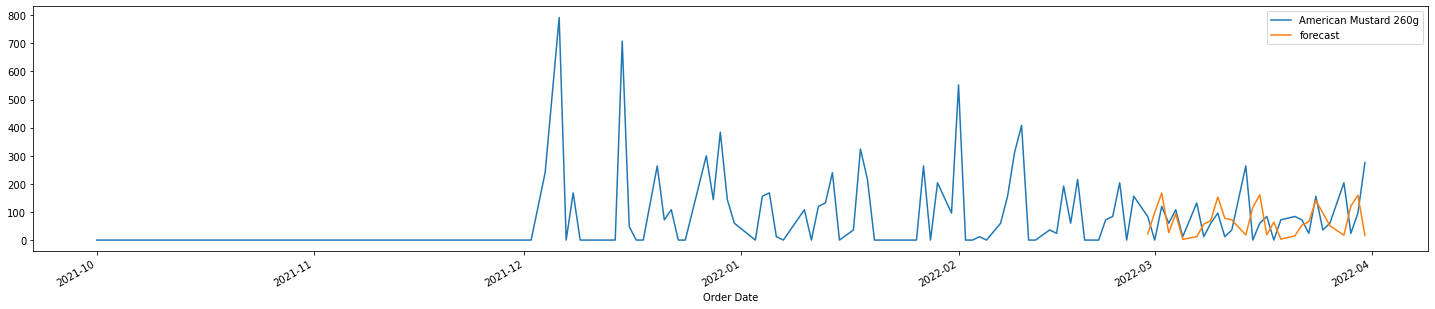

In [115]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_am['American Mustard 260g'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results=model.fit()

df_am['forecast']=results.predict(start='2022-02-28',end ='2022-3-31',dynamic=True)
df_am[['American Mustard 260g','forecast']].plot(figsize=(25,5))
plt.show()

<IPython.core.display.Javascript object>

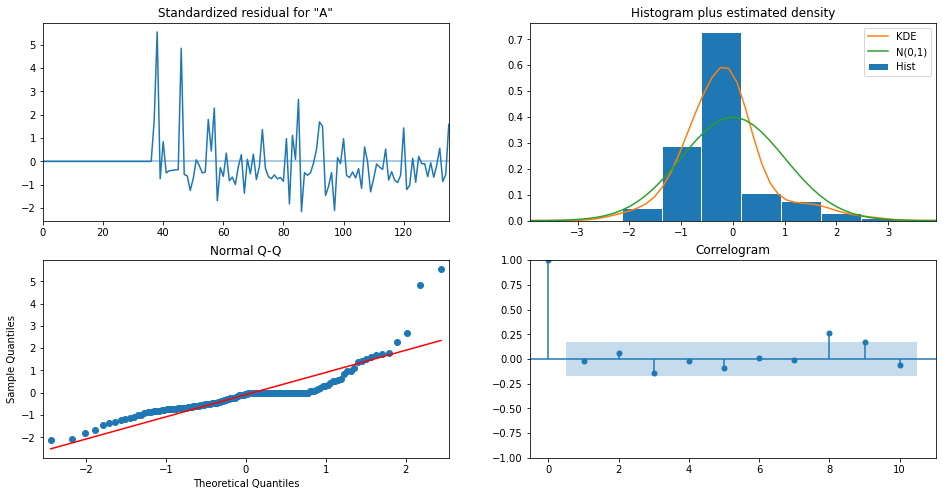

In [82]:
results.plot_diagnostics(figsize = (16, 8))
plt.show()

In [46]:
df_am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 2 to 53
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   American Mustard 260g  27 non-null     float64
 1   forecast               27 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [67]:
df_am.index[-1]

Timestamp('2022-03-31 00:00:00')

In [103]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_am.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [104]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_am.columns)

<IPython.core.display.Javascript object>

In [105]:
future_datest_df.head()

,American Mustard 260g,forecast
2022-04-30,NaN,NaN
2022-05-31,NaN,NaN
2022-06-30,NaN,NaN
2022-07-31,NaN,NaN
2022-08-31,NaN,NaN


In [106]:
future_df=pd.concat([df_am,future_datest_df])
future_df

<IPython.core.display.Javascript object>

,American Mustard 260g,forecast
2021-10-01,0.0,NaN
2021-10-02,0.0,NaN
2021-10-04,0.0,NaN
2021-10-05,0.0,NaN
2021-10-06,0.0,NaN
...,...,...
2022-10-31,NaN,NaN
2022-11-30,NaN,NaN
2022-12-31,NaN,NaN
2023-01-31,NaN,NaN


<IPython.core.display.Javascript object>

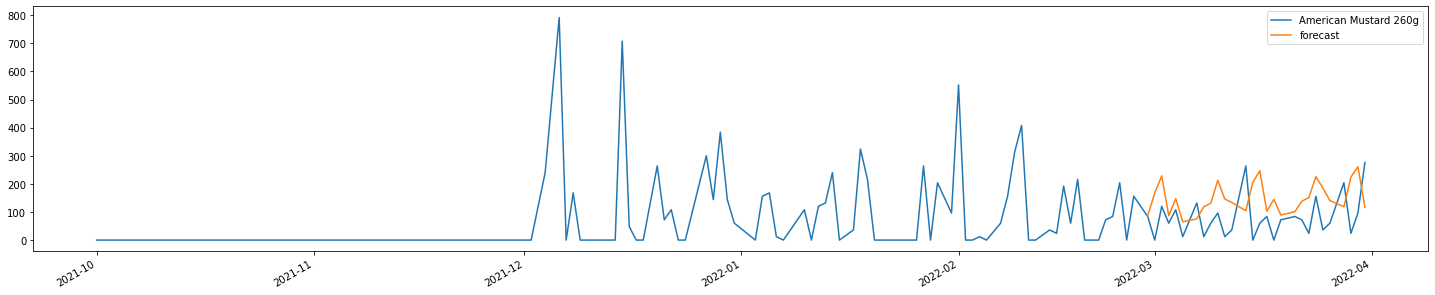

In [109]:
future_df['forecast'] = results.predict(start='2022-02-28',end ='2022-03-31',dynamic= True)  
future_df[['American Mustard 260g', 'forecast']].plot(figsize=(25, 5)) 
plt.show()

In [75]:
future_df.to_excel ('future_df.xlsx',index= False, header= True)

In [91]:
prediction = results.get_prediction(start = pd.to_datetime('2021-10-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

<IPython.core.display.Javascript object>

,lower American Mustard 260g,upper American Mustard 260g
Order Date,,
2021-10-01,-2803.883147,2803.883147
2021-10-02,-2004.842586,2004.842586
2021-10-04,-2004.624863,2004.624863
2021-10-05,-2004.623600,2004.623600
2021-10-06,-2004.623593,2004.623593
...,...,...
2022-03-26,-169.419617,329.681467
2022-03-28,-117.392144,381.548081
2022-03-29,-116.408662,382.423539


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

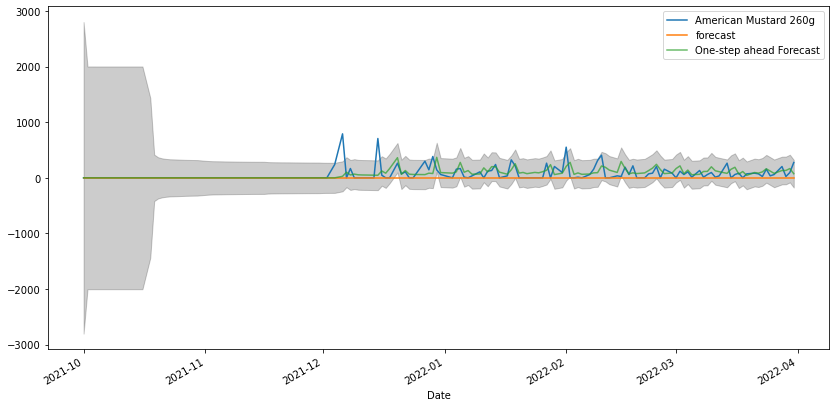

In [86]:
#Visualize the forecasting
ax = df_am['2021':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
#ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [101]:
y_actual=df_am["American Mustard 260g"]
y_pred=pred0.predicted_mean


NameError: name 'pred0' is not defined